<a href="https://colab.research.google.com/github/Kartel7/Moscow_SUHI/blob/main/CRU_TS_vs_LST_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st

In [ ]:
warnings.filterwarnings("ignore")

# Обработка данных реанализа CRU TS

In [ ]:
!pip install netcdf4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.5 MB/s eta 0:00:00


In [ ]:
cru_1990 = xr.open_dataset(r"drive/MyDrive/kursach_lst_poly/cru_ts/cru_ts4.09.1981.1990.tmp.dat.nc", engine='netcdf4')

# Загружаем CRU TS датасет за первый 10-летний период

In [ ]:
cru_1990.sizes

# Просмотр размерности

Frozen({'lon': 720, 'lat': 360, 'time': 120})

In [ ]:
cru_1990 = cru_1990.sel(time=slice('1984', '1990'))

# Обрезаем по периоду исследования

In [ ]:
cru_1990.time

# Временное разрешение - месяц

<xarray.DataArray 'time' (time: 84)> Size: 672B
array(['1984-01-16T00:00:00.000000000', '1984-02-15T00:00:00.000000000',
       '1984-03-16T00:00:00.000000000', '1984-04-16T00:00:00.000000000',
       '1984-05-16T00:00:00.000000000', '1984-06-16T00:00:00.000000000',
       '1984-07-16T00:00:00.000000000', '1984-08-16T00:00:00.000000000',
       '1984-09-16T00:00:00.000000000', '1984-10-16T00:00:00.000000000',
       '1984-11-16T00:00:00.000000000', '1984-12-16T00:00:00.000000000',
       '1985-01-16T00:00:00.000000000', '1985-02-15T00:00:00.000000000',
       '1985-03-16T00:00:00.000000000', '1985-04-16T00:00:00.000000000',
       '1985-05-16T00:00:00.000000000', '1985-06-16T00:00:00.000000000',
       '1985-07-16T00:00:00.000000000', '1985-08-16T00:00:00.000000000',
       '1985-09-16T00:00:00.000000000', '1985-10-16T00:00:00.000000000',
       '1985-11-16T00:00:00.000000000', '1985-12-16T00:00:00.000000000',
       '1986-01-16T00:00:00.000000000', '1986-02-15T00:00:00.000000000',
       '1986-03-16T00:00:00.000000000', '1986-04-16T00:00:00.000000000',
       '1986-05-16T00:00:00.000000000', '1986-06-16T00:00:00.000000000',
       '1986-07-16T00:00:00.000000000', '1986-08-16T00:00:00.000000000',
       '1986-09-16T00:00:00.000000000', '1986-10-16T00:00:00.000000000',
       '1986-11-16T00:00:00.000000000', '1986-12-16T00:00:00.000000000',
       '1987-01-16T00:00:00.000000000', '1987-02-15T00:00:00.000000000',
       '1987-03-16T00:00:00.000000000', '1987-04-16T00:00:00.000000000',
       '1987-05-16T00:00:00.000000000', '1987-06-16T00:00:00.000000000',
       '1987-07-16T00:00:00.000000000', '1987-08-16T00:00:00.000000000',
       '1987-09-16T00:00:00.000000000', '1987-10-16T00:00:00.000000000',
       '1987-11-16T00:00:00.000000000', '1987-12-16T00:00:00.000000000',
       '1988-01-16T00:00:00.000000000', '1988-02-15T00:00:00.000000000',
       '1988-03-16T00:00:00.000000000', '1988-04-16T00:00:00.000000000',
       '1988-05-16T00:00:00.000000000', '1988-06-16T00:00:00.000000000',
       '1988-07-16T00:00:00.000000000', '1988-08-16T00:00:00.000000000',
       '1988-09-16T00:00:00.000000000', '1988-10-16T00:00:00.000000000',
       '1988-11-16T00:00:00.000000000', '1988-12-16T00:00:00.000000000',
       '1989-01-16T00:00:00.000000000', '1989-02-15T00:00:00.000000000',
       '1989-03-16T00:00:00.000000000', '1989-04-16T00:00:00.000000000',
       '1989-05-16T00:00:00.000000000', '1989-06-16T00:00:00.000000000',
       '1989-07-16T00:00:00.000000000', '1989-08-16T00:00:00.000000000',
       '1989-09-16T00:00:00.000000000', '1989-10-16T00:00:00.000000000',
       '1989-11-16T00:00:00.000000000', '1989-12-16T00:00:00.000000000',
       '1990-01-16T00:00:00.000000000', '1990-02-15T00:00:00.000000000',
       '1990-03-16T00:00:00.000000000', '1990-04-16T00:00:00.000000000',
       '1990-05-16T00:00:00.000000000', '1990-06-16T00:00:00.000000000',
       '1990-07-16T00:00:00.000000000', '1990-08-16T00:00:00.000000000',
       '1990-09-16T00:00:00.000000000', '1990-10-16T00:00:00.000000000',
       '1990-11-16T00:00:00.000000000', '1990-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 672B 1984-01-16 1984-02-15 ... 1990-12-16
Attributes:
    long_name:  time

Далее открываем все остальные датасеты до н.в.

In [ ]:
cru_2000 = xr.open_dataset(r"drive/MyDrive/kursach_lst_poly/cru_ts/cru_ts4.09.1991.2000.tmp.dat.nc")

In [ ]:
cru_2010 = xr.open_dataset(r"drive/MyDrive/kursach_lst_poly/cru_ts/cru_ts4.09.2001.2010.tmp.dat.nc")

In [ ]:
cru_2020 = xr.open_dataset(r"drive/MyDrive/kursach_lst_poly/cru_ts/cru_ts4.09.2011.2020.tmp.dat.nc")

In [ ]:
cru_2024 = xr.open_dataset(r"drive/MyDrive/kursach_lst_poly/cru_ts/cru_ts4.09.2021.2024.tmp.dat.nc")

In [ ]:
crus = [cru_1990, cru_2000, cru_2010, cru_2020, cru_2024]

# Добавляем их в список

In [ ]:
crus[0]

# Пример df

<xarray.Dataset> Size: 435MB
Dimensions:  (lon: 720, lat: 360, time: 84)
Coordinates:
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 672B 1984-01-16 1984-02-15 ... 1990-12-16
Data variables:
    tmp      (time, lat, lon) float32 87MB ...
    stn      (time, lat, lon) float64 174MB ...
    mae      (time, lat, lon) float32 87MB ...
    maea     (time, lat, lon) float32 87MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.09 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2503051245. Data generated from:tmp.2503051121.dtb
    history:      Wed  5 Mar 13:28:04 GMT 2025 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [ ]:
# Определяем примерные границы Москвы (из-за разрешения это будет одно значение за каждую единицу времени)

lat_max = 56.0  # северная граница
lat_min = 55.5  # южная граница
lon_min = 37.3  # западная граница
lon_max = 37.9  # восточная граница

In [ ]:
# Берем датасет за каждый подпериод времени и усредняем за летние месяцы. Результат - одно число на каждый год для московской агломерации и прилежащих территорий

mean_temp_by_year = {}
for df in crus:
  df_t_msc = df['tmp'].sel(lat=slice(lat_min,lat_max), lon=slice(lon_min,lon_max))
  df_summer = df_t_msc.where(df.time.dt.month.isin([6,7,8]), drop=True)
  df_summer_mean = df_summer.groupby('time.year').mean(dim='time')
  print('Средние летние температуры:', df_summer_mean)
  for year in np.array(df_summer_mean.year):
    mean_temp_by_year[int(year)] = float(df_summer_mean[df_summer_mean.year == year].values)

Средние летние температуры: <xarray.DataArray 'tmp' (year: 7, lat: 1, lon: 1)> Size: 28B
array([[[16.366667]],

       [[17.166666]],

       [[17.633333]],

       [[16.766666]],

       [[19.233332]],

       [[18.566668]],

       [[16.5     ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 4B 37.75
  * lat      (lat) float32 4B 55.75
  * year     (year) int64 56B 1984 1985 1986 1987 1988 1989 1990
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0
Средние летние температуры: <xarray.DataArray 'tmp' (year: 10, lat: 1, lon: 1)> Size: 40B
array([[[17.800001]],

       [[17.833334]],

       [[16.1     ]],

       [[16.766668]],

       [[18.466667]],

       [[17.333334]],

       [[18.266668]],

       [[17.966667]],

       [[19.633333]],

       [[17.633333]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 4B 37.75
  * lat      (lat) float32 4B 55.75
  * ye

In [ ]:
mean_temp_by_year

# Средние летние температуры согласно реанализу CRU TS

{1984: 16.366666793823242,
 1985: 17.16666603088379,
 1986: 17.633333206176758,
 1987: 16.766666412353516,
 1988: 19.23333168029785,
 1989: 18.566667556762695,
 1990: 16.5,
 1991: 17.80000114440918,
 1992: 17.83333396911621,
 1993: 16.100000381469727,
 1994: 16.76666831970215,
 1995: 18.46666717529297,
 1996: 17.33333396911621,
 1997: 18.26666831970215,
 1998: 17.96666717529297,
 1999: 19.633333206176758,
 2000: 17.633333206176758,
 2001: 18.533334732055664,
 2002: 19.000001907348633,
 2003: 17.5,
 2004: 17.666667938232422,
 2005: 17.53333282470703,
 2006: 17.899999618530273,
 2007: 18.500001907348633,
 2008: 17.46666717529297,
 2009: 17.30000114440918,
 2010: 20.533334732055664,
 2011: 19.566667556762695,
 2012: 18.26666831970215,
 2013: 18.866666793823242,
 2014: 18.33333396911621,
 2015: 17.80000114440918,
 2016: 19.133333206176758,
 2017: 16.933334350585938,
 2018: 18.633333206176758,
 2019: 17.233333587646484,
 2020: 18.03333282470703,
 2021: 20.366666793823242,
 2022: 19.73333358

In [ ]:
df_reanalysis = pd.DataFrame(data=mean_temp_by_year.values(), index = mean_temp_by_year.keys(), columns=['temp_reanalysis'])

# Превращаем в DataFrame

In [ ]:
df_reanalysis.head()

,temp_reanalysis
1984,16.366667
1985,17.166666
1986,17.633333
1987,16.766666
1988,19.233332


# Загружаем свои данные по LST (получены через GEE)

In [ ]:
df_lst = pd.read_csv(r'drive/MyDrive/kursach_lst_poly/LST_Mean_by_ROI.csv')

In [ ]:
df_lst.head()

,system:index,mean_LST_by_Region,year,.geo
0,0,295.879176,1984.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1,296.131240,1985.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,2,298.523055,1986.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,3,293.709976,1987.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,4,301.129428,1988.0,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [ ]:
df_lst = df_lst[['mean_LST_by_Region', 'year']]

In [ ]:
df_lst['year'] = df_lst['year'].astype(int)

# Годы в целые числа

In [ ]:
df_lst['mean_LST_by_Region'] = df_lst['mean_LST_by_Region']-273.15

# Кельвины в Цельсии

In [ ]:
df_lst = df_lst.set_index('year')

# Смотрим по годам

In [ ]:
df = pd.merge(df_reanalysis, df_lst, how='outer', left_index=True, right_index=True)

# Объединяем оба df для сравнения

In [ ]:
df.corr()

# Корреляция умеренно выражена

,temp_reanalysis,mean_LST_by_Region
temp_reanalysis,1.00000,0.53481
mean_LST_by_Region,0.53481,1.00000


In [ ]:
df.loc[[1993,1998,2012]]

# Наши пустые данные

,temp_reanalysis,mean_LST_by_Region
1993,16.100000,NaN
1998,17.966667,NaN
2012,18.266668,NaN


In [ ]:
# Линейно интерполируем пропущенные 3 года - необходимо для построения линий тренда

df_filled_data = df.copy()
df_filled_data['mean_LST_by_Region'] = df_filled_data['mean_LST_by_Region'].interpolate('linear')

In [ ]:
df_filled_data.loc[[1993,1998,2012]]

,temp_reanalysis,mean_LST_by_Region
1993,16.100000,23.567229
1998,17.966667,27.094277
2012,18.266668,23.938989


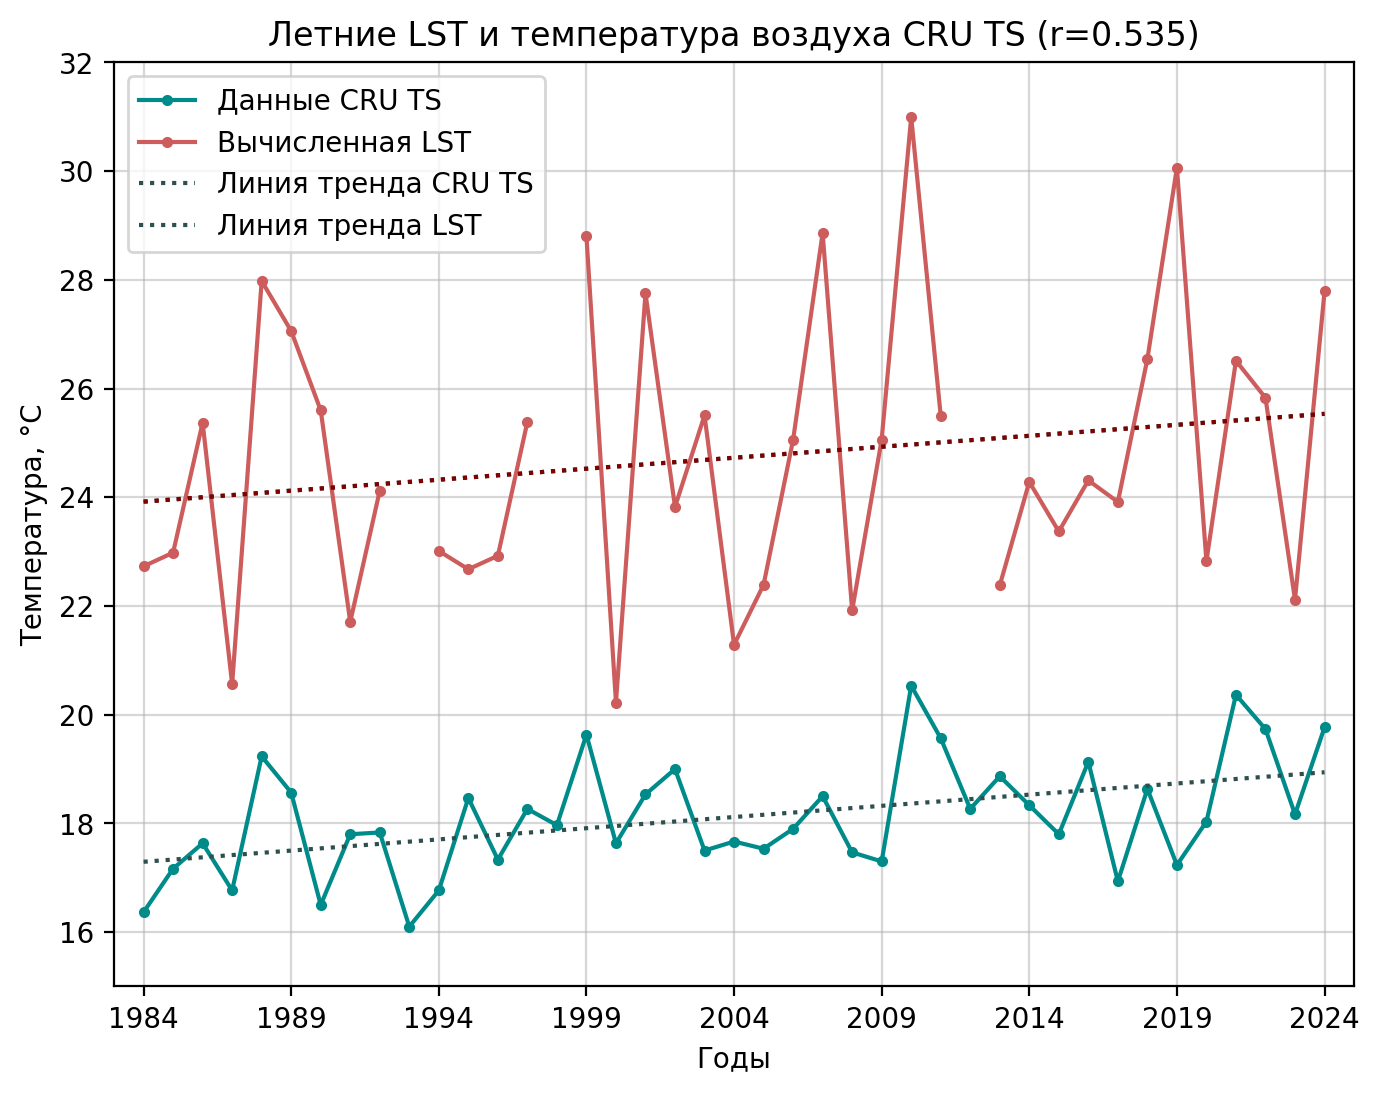

In [ ]:
# Сохраним в списках статистические показатели и сами уравнения линий тренда
results = []
eq = []

# Визуализируем данные

fig, axes = plt.subplots(figsize=(8,6), dpi=200)

x = df.index
y_rea = df['temp_reanalysis']
y_lst = df['mean_LST_by_Region']

axes.plot(x, y_rea, color='darkcyan', marker='.')
axes.plot(x, y_lst, color='indianred', marker='.')

# Считаем линии тренда

y_lst_filled = df_filled_data['mean_LST_by_Region']

# Линейная регрессия для CRU TS
slope, intercept, r_value, p_value, std_err = st.linregress(x, y_rea)
eq.append(f'{np.round(slope,5)}*x {np.round(intercept,2)}')

axes.plot(x, slope*x + intercept, color='darkslategray', ls=':')

# Сохраняем результат
results.append({
    'model': 'CRU TS',
    'n_points': len(x),
    'slope': slope,
    'intercept': intercept,
    'r_value': r_value,
    'p_value': p_value,
    'std_err': std_err
})

# Линейная регрессия для наших вычислений

slope, intercept, r_value, p_value, std_err = st.linregress(x, y_lst_filled)
eq.append(f'{np.round(slope,5)}*x {np.round(intercept,2)}')

axes.plot(x, slope*x + intercept, color='darkslategray', ls=':')

# Сохраняем результат
results.append({
    'model': 'Вычисленные LST',
    'n_points': len(x),
    'slope': slope,
    'intercept': intercept,
    'r_value': r_value,
    'p_value': p_value,
    'std_err': std_err
})

axes.plot(x, slope*x + intercept, color='maroon', ls=':')

# Превращаем в DataFrame
results_df = pd.DataFrame(results)

# Оформляем

axes.set_xlim(1983,2025)
axes.set_ylim(15,32)
axes.set_xticks(np.arange(1984,2025,5))
axes.grid('lightgrey', alpha=0.5)

axes.set_title('Летние LST и температура воздуха CRU TS (r=0.535)')
axes.set_xlabel('Годы')
axes.set_ylabel('Температура, °C')
axes.legend(['Данные CRU TS','Вычисленная LST', 'Линия тренда CRU TS', 'Линия тренда LST'], loc=2)


plt.savefig(r'drive/MyDrive/kursach_lst_poly/LST_vs_ReanalysisT_v2.png')

In [ ]:
print('Линия тренда для T реанализа: \n', eq[0])
print('Линия тренда для вычисленной LST: \n', eq[1])
# Наклон линии тренда практически одинаков!

Линия тренда для T реанализа: 
 0.04117*x -64.39
Линия тренда для вычисленной LST: 
 0.04038*x -56.2


In [ ]:
results_df

,model,n_points,slope,intercept,r_value,p_value,std_err
0,CRU TS,41,0.041173,-64.393757,0.464014,0.002244,0.012586
1,Вычисленные LST,41,0.040382,-56.197975,0.188383,0.238186,0.033711


**Из-за шума в вычисленных значениях они статистически не значимы.
Но по существу они крайне близки к данным реанализа как к эталону**